# Medical Cost Personal Insurance Project

In [5]:
# importing required laberies 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading and Exploring the dataset

In [6]:
df=pd.read_csv('medical_cost_insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Rows and columns 
df.shape

(1338, 7)

In [9]:
df.info() ## Detail of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the results from info, we see that there are no null values in the data and the different data types of the columns

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [92]:
df.describe()## General statistical description of Numerical variables

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


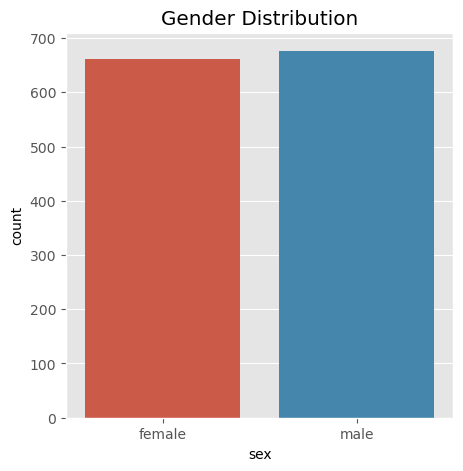

In [11]:
#gender distribution by countplot
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

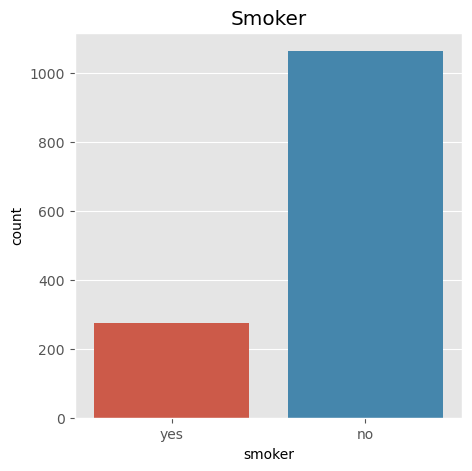

In [94]:
#
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

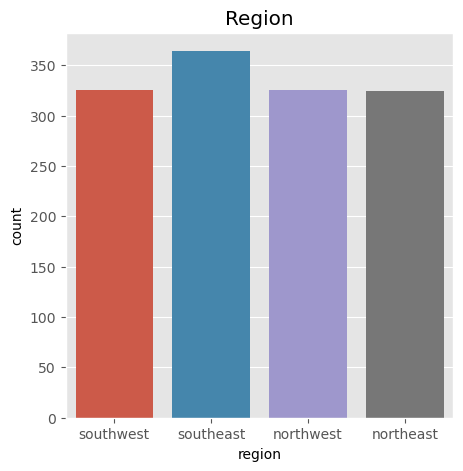

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show() 

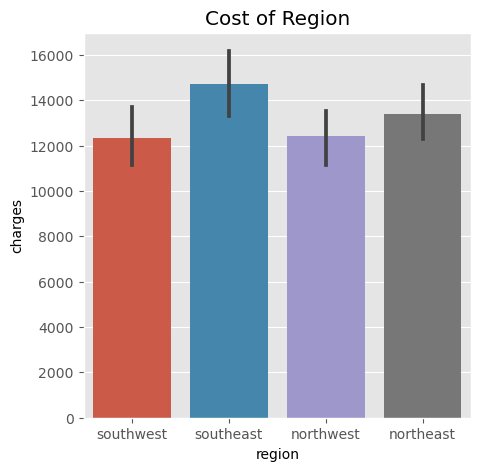

In [96]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)
plt.title('Cost of Region')
plt.show() 

Text(0.5, 1.0, 'Charges of Smoker')

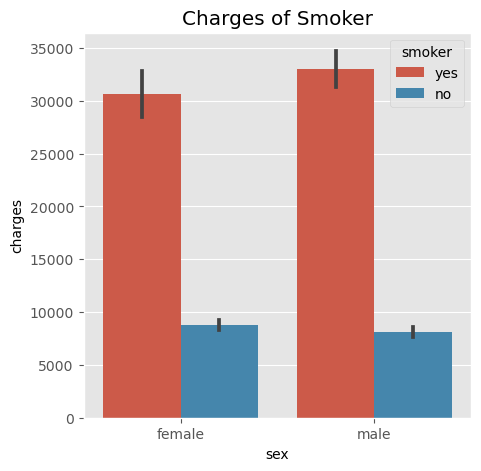

In [97]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.title('Charges of Smoker')

<Axes: xlabel='region', ylabel='charges'>

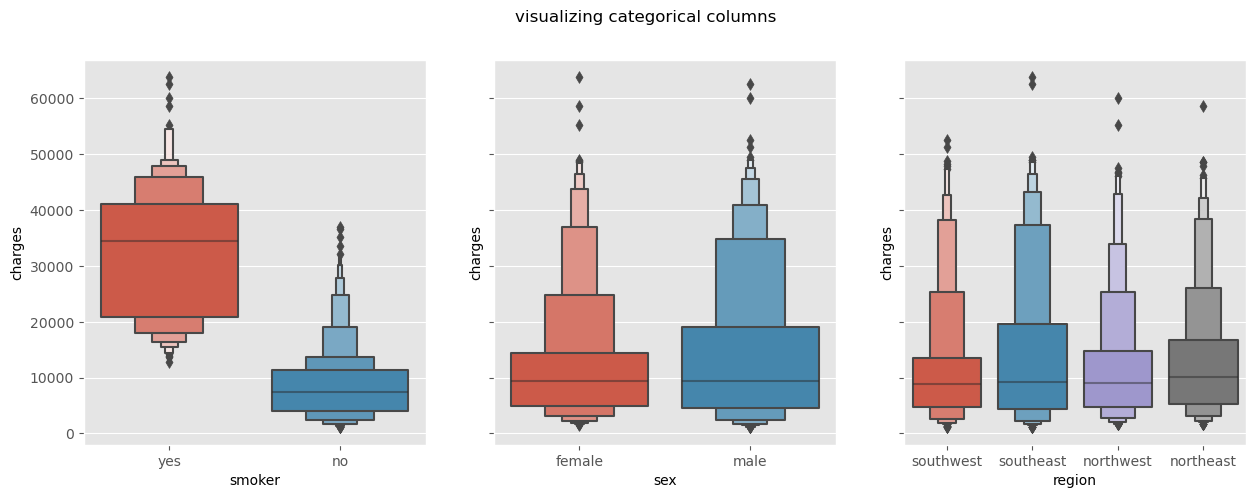

In [12]:
#Visualizing categorical
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('visualizing categorical columns')
sns.boxenplot(x='smoker',y='charges',data=df,ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df,ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df,ax=axes[2])

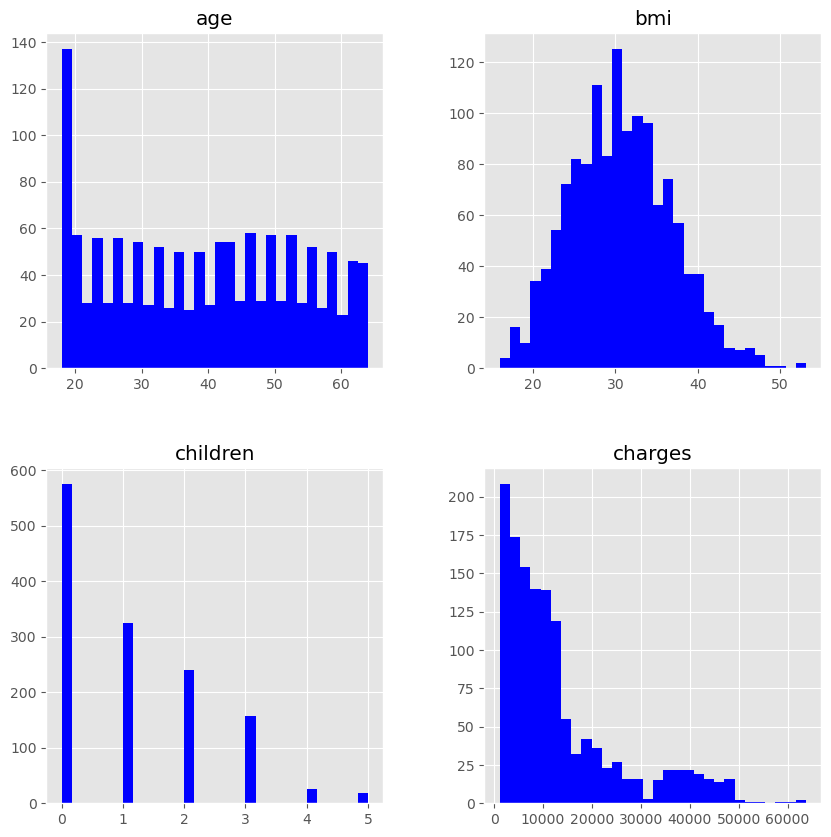

In [99]:


df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [100]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df['sex']=df['sex'].apply({'male':0,'female':1}.get)
df['smoker']=df['smoker'].apply({'yes':1,'no':0}.get)
df['region']=df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [102]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


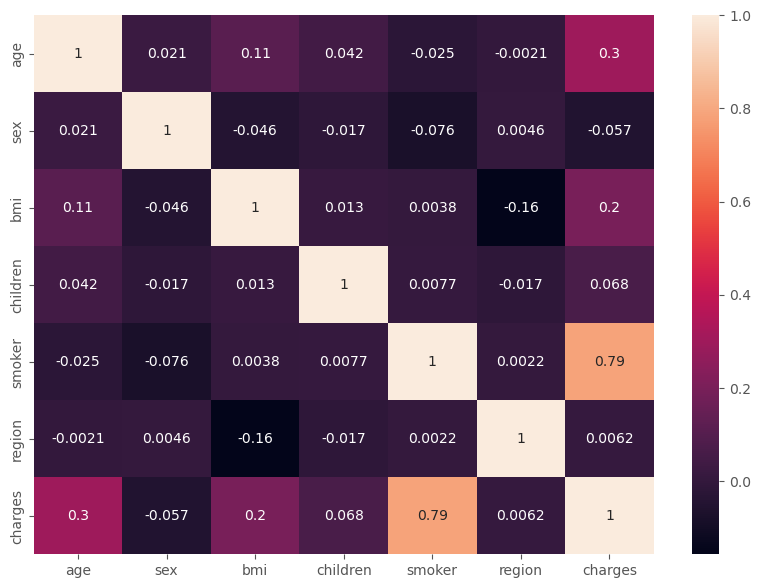

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [104]:
X=df.drop(['charges','sex'], axis=1)
y=df.charges

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (936, 5)
X_test shape: (402, 5)
y_train shape: (936,)
y_test shape: (402,)


In [106]:
linreg=LinearRegression()

In [108]:
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)

In [109]:
from sklearn.metrics import r2_score

In [110]:
print("R2 score:",(r2_score(y_test,pred)))

R2 score: 0.7697211527941855


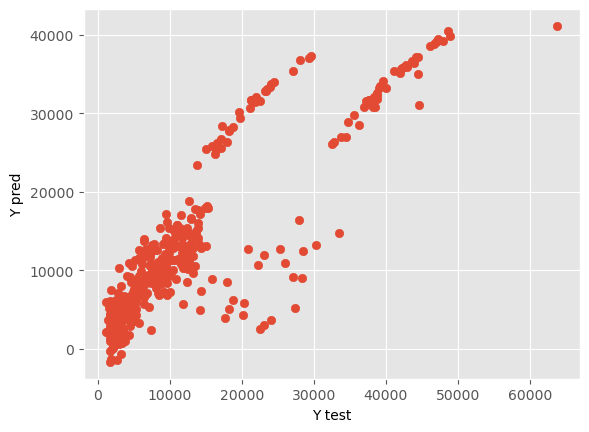

In [111]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [118]:
data={'age':50,'bmi':25,'children':2,'smoker':0,'region':2}
index=[0]
cust_df=pd.DataFrame(data,index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [119]:
cost_pred=linreg.predict(cust_df)
print('The medical insurance cost of the new customer is:', cost_pred)

The medical insurance cost of the new customer is: [9579.86504857]
